# Diamond Price Prediction
#### Comparing KNN from Scratch and KNN using ML Model.

### Data Description:
1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 

### Load Data

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [4]:
# Loading dataset
df_gc = pd.read_csv("/drive/My Drive/Colab Notebooks/ML Tasks/diamonds.csv")

In [5]:
# First 3 columns
df_gc.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [6]:
# Shape of data
df_gc.shape

(53940, 10)

In [7]:
# Renaming columns
df_gc.rename(columns={'x':'length', 'y':'width', 'z':'depth', 'depth':'depth%'}, inplace = True)

In [8]:
# Creating Target column seperately to concat it at the end of the columns
df_gc_target = df_gc[['price']]
df_gc_target.head(3)

,price
0,326
1,326
2,327


In [9]:
# Dropping the Target column
df_gc = df_gc.drop('price', axis = 1)
df_gc.head(3)

,carat,cut,color,clarity,depth%,table,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31


In [10]:
# Concating Target column at the end of the columns
df_gc = pd.concat([df_gc, df_gc_target], axis = 1)
df_gc.head(3)

,carat,cut,color,clarity,depth%,table,length,width,depth,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327


In [11]:
# Shape of data
df_gc.shape

(53940, 10)

### Exploratory Data Analysis

In [12]:
# Description of data
df_gc.describe()

,carat,depth%,table,length,width,depth,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [13]:
# There are missing values assigned as 0 in columns
df_gc[['length','width','depth']][(df_gc['length']==0) | (df_gc['width']==0) | (df_gc['depth']==0)]

,length,width,depth
2207,6.55,6.48,0.0
2314,6.66,6.60,0.0
4791,6.50,6.47,0.0
5471,6.50,6.47,0.0
10167,7.15,7.04,0.0
11182,0.00,6.62,0.0
11963,0.00,0.00,0.0
13601,6.88,6.83,0.0
15951,0.00,0.00,0.0
24394,8.49,8.45,0.0


In [14]:
# Replacing 0 (missing values) with Null values (np.NaN).
df_gc[['length','width','depth']] = df_gc[['length','width','depth']].replace(0, np.NaN)

In [15]:
# Checking Null Values
df_gc.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth%      0
table       0
length      8
width       7
depth      20
price       0
dtype: int64

In [16]:
# Dropping Null Values
df_gc.dropna(inplace = True)

In [17]:
# Rechecking Null Values
df_gc.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth%     0
table      0
length     0
width      0
depth      0
price      0
dtype: int64

In [18]:
# Data Information
df_gc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth%   53920 non-null  float64
 5   table    53920 non-null  float64
 6   length   53920 non-null  float64
 7   width    53920 non-null  float64
 8   depth    53920 non-null  float64
 9   price    53920 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [19]:
# Shape of data
df_gc.shape

(53920, 10)

**Observation:** There are no Null Values in our DataFrame.

### Univariate Analysis on Continous Variables:

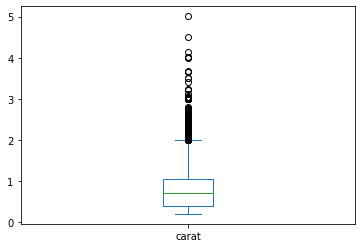

In [20]:
# Carat Column
df_gc['carat'].plot.box()

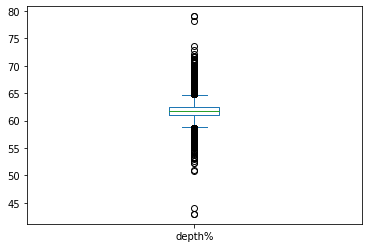

In [21]:
# Depth% Column
df_gc['depth%'].plot.box()

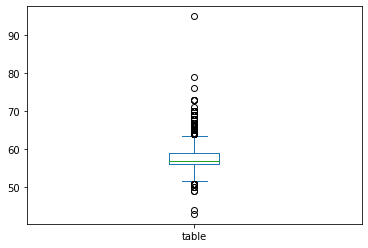

In [22]:
# Table Column
df_gc['table'].plot.box()

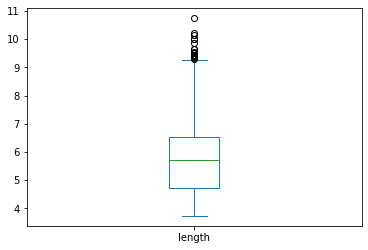

In [23]:
# Length Column
df_gc['length'].plot.box()

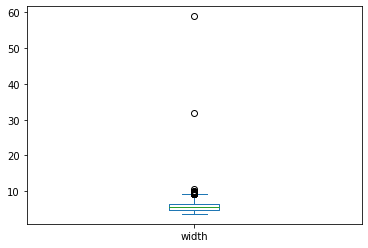

In [24]:
# Width Column
df_gc['width'].plot.box()

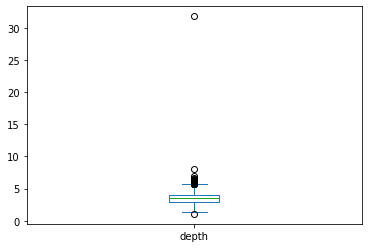

In [25]:
# Depth Column
df_gc['depth'].plot.box()

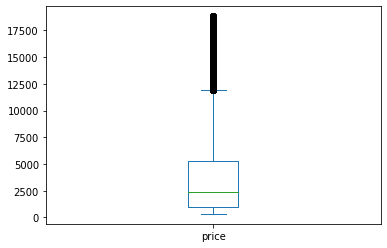

In [26]:
# Price Column
df_gc['price'].plot.box()

### Univariate Analysis on Categorical Variable:

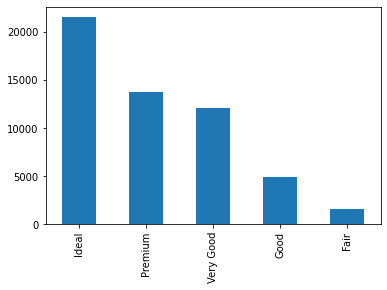

In [27]:
# BARPLOT for CUT
df_gc['cut'].value_counts().plot.bar()

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

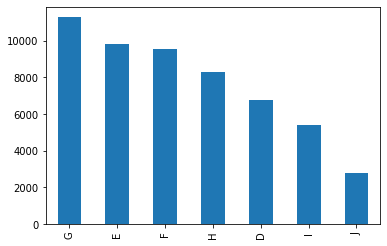

In [28]:
# BARPLOT for COLOR
df_gc['color'].value_counts().plot.bar()

color : diamond colour, from J (worst) to D (best)

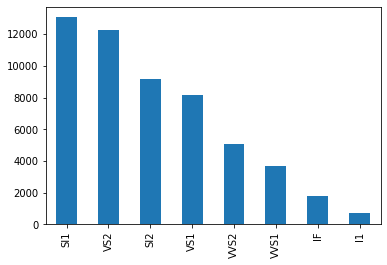

In [29]:
# BARPLOT for CLARITY
df_gc['clarity'].value_counts().plot.bar()

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

### Bivariate Analysis on Numerical- Numerical Variables:

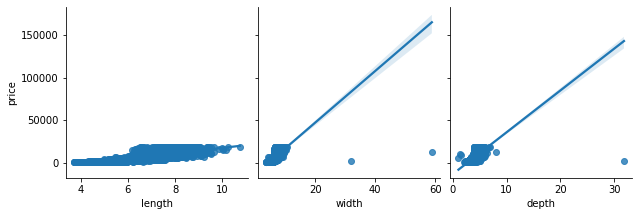

In [30]:
# Pairplot
g= sns.pairplot(df_gc , height=3, aspect =1, x_vars = ['length','width','depth'] , y_vars =  ['price'] , kind = 'reg')

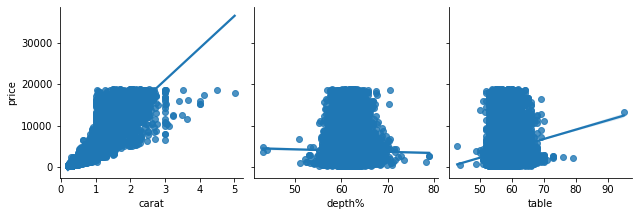

In [31]:
# Pairplot
g= sns.pairplot(df_gc , height=3, aspect =1, x_vars = ['carat','depth%', 'table'] , y_vars =  ['price'] , kind = 'reg')

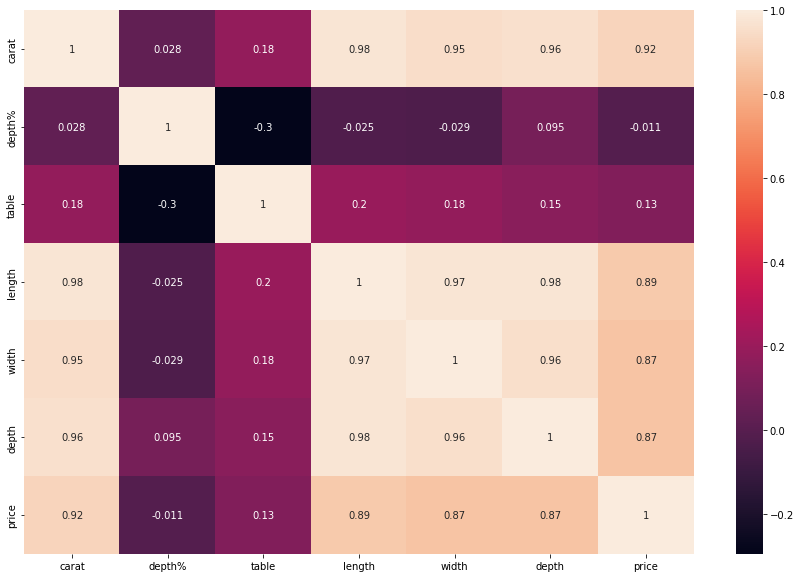

In [32]:
# Heatmap
corr = df_gc.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr , xticklabels=corr.columns , yticklabels=corr.columns , annot=True)

#### There is a high correlation between carat, length, width, depth and price.

### Bivariate Analysis on Categorical - Continous Variables:

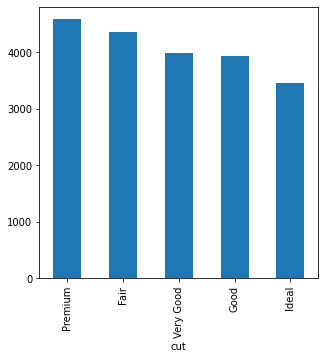

In [33]:
# BARPLOT for Cut and Price
fig, ax = plt.subplots(figsize=(5,5))
df_gc.groupby('cut')['price'].mean().sort_values(ascending = False).plot.bar()

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

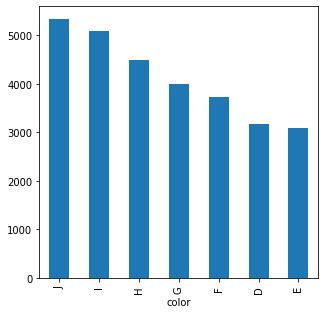

In [34]:
# BARPLOT for Color and Price
fig, ax = plt.subplots(figsize=(5,5))
df_gc.groupby('color')['price'].mean().sort_values(ascending = False).plot.bar()

color : diamond colour, from J (worst) to D (best)

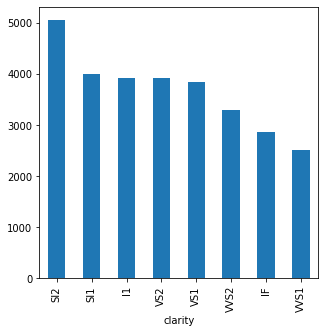

In [35]:
# BARPLOT for Clarity and Price
fig, ax = plt.subplots(figsize=(5,5))
df_gc.groupby('clarity')['price'].mean().sort_values(ascending = False).plot.bar()

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

#### Splitting the Target and Independent Columns

In [36]:
X = df_gc.drop('price', axis = 1)

In [37]:
y = df_gc[['price']]

In [38]:
X.head()

,carat,cut,color,clarity,depth%,table,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [39]:
y.head()

,price
0,326
1,326
2,327
3,334
4,335


### Splitting Data into Train and Test

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (40440, 9) (40440, 1)
Test Set:  (13480, 9) (13480, 1)


### Label Encoding

In [41]:
# Importing LabelEncoder Module
from sklearn.preprocessing import LabelEncoder

In [42]:
X_train.head()

,carat,cut,color,clarity,depth%,table,length,width,depth
42571,0.38,Premium,E,VVS1,61.9,58.0,4.66,4.62,2.87
20932,1.51,Very Good,E,SI2,61.2,58.0,7.30,7.35,4.48
3488,0.90,Good,I,VS2,62.5,59.0,6.06,6.13,3.81
11868,1.16,Ideal,I,SI1,62.4,57.0,6.71,6.75,4.20
27500,2.07,Ideal,H,SI2,63.5,53.0,8.12,8.09,5.14


In [43]:
X_test.head()

,carat,cut,color,clarity,depth%,table,length,width,depth
10219,1.00,Ideal,E,SI2,61.8,57.0,6.39,6.43,3.96
22845,1.51,Good,E,SI2,58.9,61.0,7.54,7.50,4.43
43017,0.50,Ideal,H,VS1,61.9,54.0,5.12,5.15,3.18
35171,0.31,Ideal,G,IF,61.0,56.0,4.38,4.41,2.68
1456,0.80,Ideal,E,SI2,61.0,55.0,6.00,6.03,3.67


In [44]:
# label encoding the categorical columns
le= LabelEncoder()
X_train['cut']=le.fit_transform(X_train['cut'])
X_train['color']=le.fit_transform(X_train['color'])
X_train['clarity']=le.fit_transform(X_train['clarity'])

In [45]:
# label encoding the categorical columns
le= LabelEncoder()
X_test['cut']=le.fit_transform(X_test['cut'])
X_test['color']=le.fit_transform(X_test['color'])
X_test['clarity']=le.fit_transform(X_test['clarity'])

### Standardization

In [46]:
from sklearn import preprocessing
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [47]:
X_train_norm[0:1]

array([[-0.87891522,  0.43360811, -0.93871142,  1.24949381,  0.10230313,
         0.24592578, -0.95596765, -0.97466825, -0.94815031]])

In [48]:
X_test_norm[0:1]

array([[ 0.44096913, -0.53650903, -0.93177071, -0.47345284,  0.04350722,
        -0.20984386,  0.59590245,  0.61979885,  0.61663066]])

### KNN Scratch

In [49]:
distance=np.zeros(y_test.shape)
y_test_pred=np.zeros(y_test.shape)
k=3
for i in range(len(X_test_norm)):
    distance=np.sqrt(((X_test_norm[i]-X_train_norm)**2).sum(axis=1))
    sort_value=(np.argsort(distance))
    sort_value=sort_value[:k]
    y_test_pred[i]=y_train.iloc[sort_value].mean()
print(y_test_pred)

[[4707.33333333]
 [9462.66666667]
 [1235.66666667]
 ...
 [3048.        ]
 [2640.        ]
 [1250.        ]]


In [50]:
y_test_pred = pd.DataFrame(y_test_pred)

In [51]:
y_test_pred.head()

,0
0,4707.333333
1,9462.666667
2,1235.666667
3,945.333333
4,2675.666667


In [52]:
type(y_test_pred)

pandas.core.frame.DataFrame

In [53]:
y_test_pred.shape

(13480, 1)

In [54]:
y_test.shape

(13480, 1)

In [55]:
#Comparision dataframe
comp_df_gc = pd.DataFrame(list(zip(y_test['price'], y_test_pred[0])),
               columns =['Y_test', 'Y_test_pred'])
comp_df_gc.head()

,Y_test,Y_test_pred
0,4743,4707.333333
1,10884,9462.666667
2,1370,1235.666667
3,891,945.333333
4,2978,2675.666667


### Evaluation of Scratch KNN

In [56]:
from sklearn import metrics
knn_scratch_acu=metrics.r2_score(y_test,y_test_pred)

### KNN from Scikit learn Library

In [57]:
#Importing KNN regressor class from neighbours module
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=3)

In [58]:
pred=model.predict(X_test_norm) #make prediction on test set
skl_acu=metrics.r2_score(y_test,pred)

In [59]:
print("Accuracy calculated using knn scratch:",knn_scratch_acu)
print("Accuracy calculated using Scikitlearn:",skl_acu)

Accuracy calculated using knn scratch: 0.9584781746484409
Accuracy calculated using Scikitlearn: 0.958469852170927


# Therefore, We got the same accuracy from both the methods.